### Energy Consumption 

In [266]:
import pandas as pd

In [267]:
df= pd.read_csv("Energy consumption.csv")
df

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [269]:
df['Building Type'].value_counts()

Building Type
Residential    347
Commercial     336
Industrial     317
Name: count, dtype: int64

                     Square Footage  Number of Occupants  Appliances Used  \
Square Footage             1.000000             0.033379        -0.013478   
Number of Occupants        0.033379             1.000000         0.023646   
Appliances Used           -0.013478             0.023646         1.000000   
Average Temperature        0.027273             0.014122        -0.062870   
Energy Consumption         0.774873             0.354485         0.312792   

                     Average Temperature  Energy Consumption  
Square Footage                  0.027273            0.774873  
Number of Occupants             0.014122            0.354485  
Appliances Used                -0.062870            0.312792  
Average Temperature             1.000000           -0.034487  
Energy Consumption             -0.034487            1.000000  


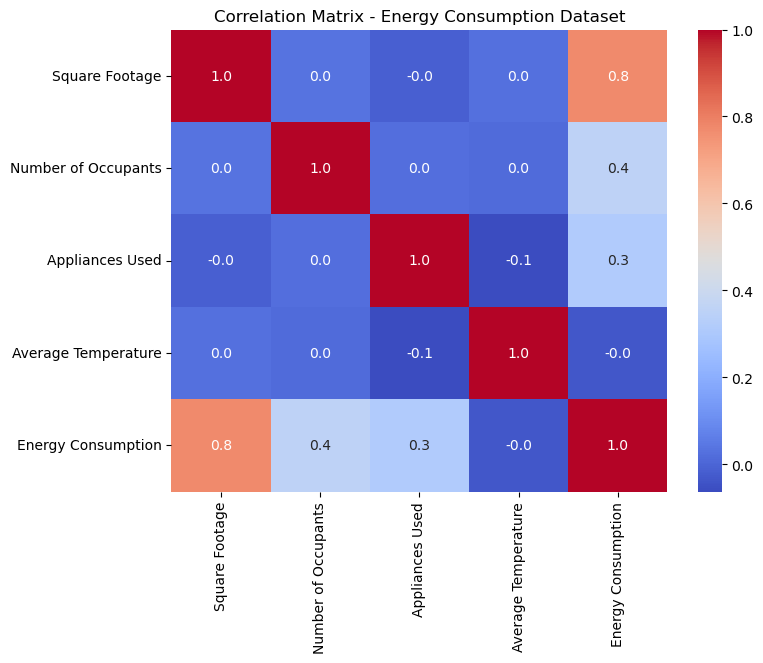

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (numeric columns only)
corr_matrix = df.corr(numeric_only=True)

# Print correlation matrix
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Matrix - Energy Consumption Dataset")
plt.show()

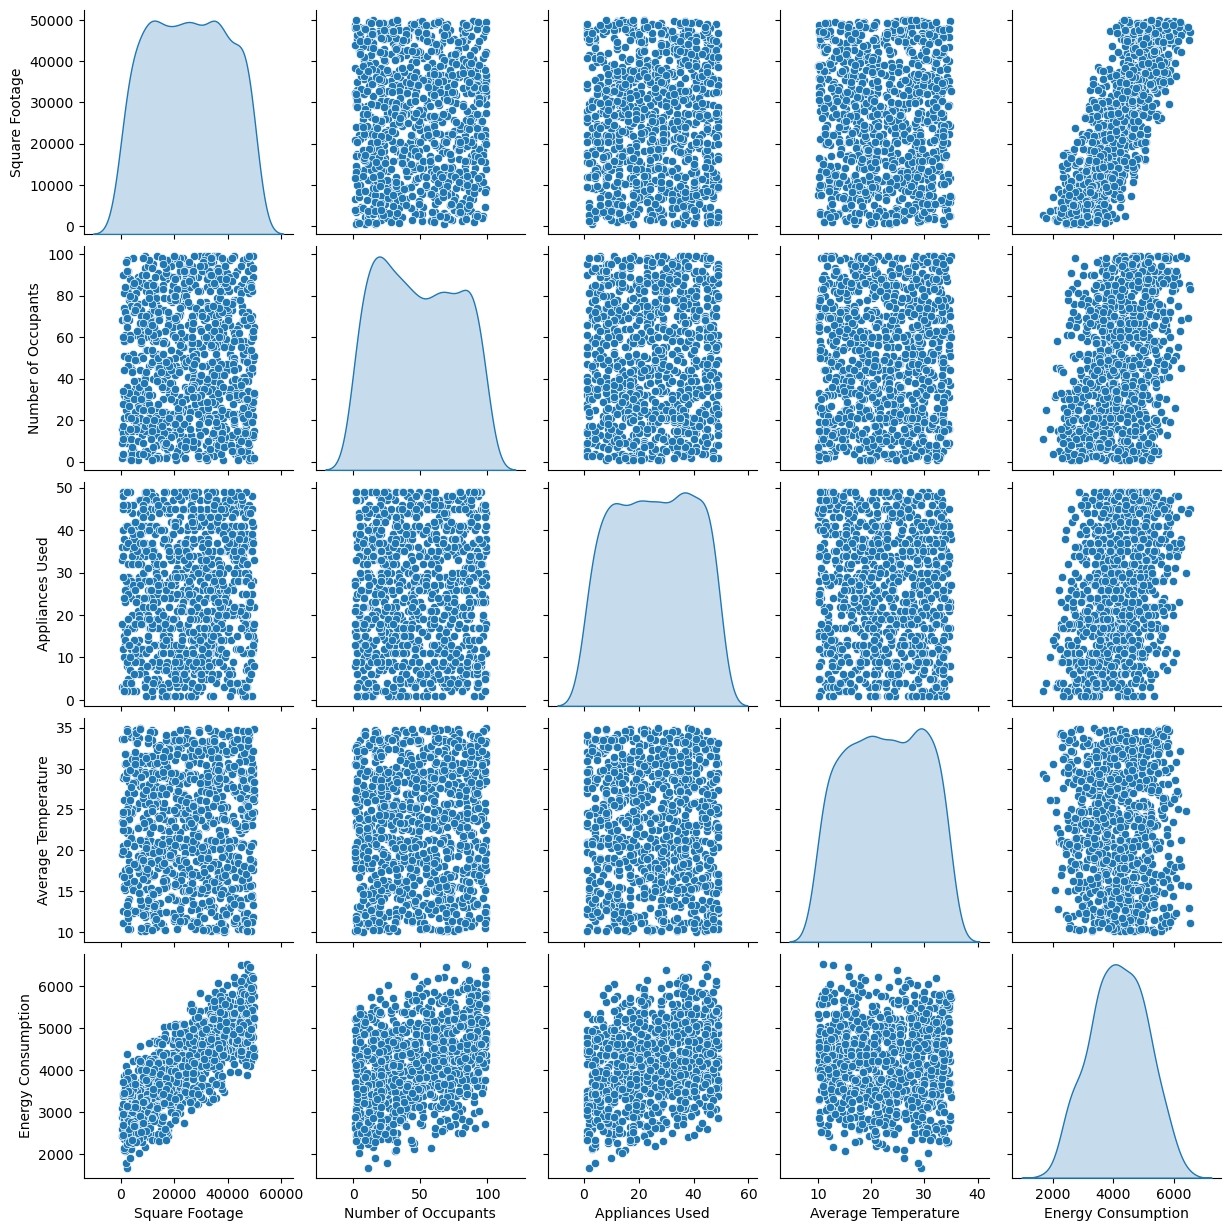

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for numerical columns only
sns.pairplot(df, diag_kind="kde")
plt.show()

In [272]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Energy Consumption','Average Temperature'])
y=df['Energy Consumption']

x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.2, random_state=42)

In [273]:
x_test

,Building Type,Square Footage,Number of Occupants,Appliances Used,Day of Week
521,Commercial,40192,23,23,Weekend
737,Residential,8406,25,36,Weekday
740,Industrial,47719,92,7,Weekend
660,Commercial,37435,26,35,Weekday
411,Commercial,11331,47,43,Weekend
...,...,...,...,...,...
619,Commercial,13213,79,30,Weekend
855,Commercial,37179,82,22,Weekend
803,Commercial,41100,8,49,Weekday
645,Residential,33539,21,15,Weekday


In [274]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,OrdinalEncoder

In [275]:
Nominal_encoder=['Building Type','Day of Week']
standard_Scaler=['Square Footage','Number of Occupants','Appliances Used']

In [276]:
Preprocessor=ColumnTransformer(
    transformers=[('Nominal',OneHotEncoder(),Nominal_encoder),
                  ('Numeric',StandardScaler(),standard_Scaler)]

)

In [277]:
Preprocessor

ColumnTransformer(transformers=[('Nominal', OneHotEncoder(),
                                 ['Building Type', 'Day of Week']),
                                ('Numeric', StandardScaler(),
                                 ['Square Footage', 'Number of Occupants',
                                  'Appliances Used'])])

### Linear REGRESSION

Decision Tree

### Random Forest

ADA Boost Regressor

### XGB Regressor

LGB Regressor

In [278]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[('preprocessor',Preprocessor),('regression',LinearRegression())])

In [279]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Nominal', OneHotEncoder(),
                                                  ['Building Type',
                                                   'Day of Week']),
                                                 ('Numeric', StandardScaler(),
                                                  ['Square Footage',
                                                   'Number of Occupants',
                                                   'Appliances Used'])])),
                ('regression', LinearRegression())])

In [280]:
x_test

,Building Type,Square Footage,Number of Occupants,Appliances Used,Day of Week
521,Commercial,40192,23,23,Weekend
737,Residential,8406,25,36,Weekday
740,Industrial,47719,92,7,Weekend
660,Commercial,37435,26,35,Weekday
411,Commercial,11331,47,43,Weekend
...,...,...,...,...,...
619,Commercial,13213,79,30,Weekend
855,Commercial,37179,82,22,Weekend
803,Commercial,41100,8,49,Weekday
645,Residential,33539,21,15,Weekday


In [281]:
x_test["Energry_consumption"]=y_test

In [282]:
x_test["Prediction"]=pipeline.predict(x_test)

In [283]:
x_test

,Building Type,Square Footage,Number of Occupants,Appliances Used,Day of Week,Energry_consumption,Prediction
521,Commercial,40192,23,23,Weekend,4549.59,4587.5000
737,Residential,8406,25,36,Weekday,2842.91,2831.4375
740,Industrial,47719,92,7,Weekend,5781.83,5820.8750
660,Commercial,37435,26,35,Weekday,4773.54,4777.8750
411,Commercial,11331,47,43,Weekend,3791.04,3791.3125
...,...,...,...,...,...,...,...
619,Commercial,13213,79,30,Weekend,3916.99,3939.9375
855,Commercial,37179,82,22,Weekend,5048.34,5003.5625
803,Commercial,41100,8,49,Weekday,5063.09,5065.5000
645,Residential,33539,21,15,Weekday,3593.42,3620.2500


In [284]:
x_test["Actual_Error"]=x_test["Energry_consumption"] - x_test["Prediction"]

In [285]:
x_test["Absolute_Actual_Error"]=abs(x_test["Actual_Error"])

In [286]:
x_test["Absolute_Precentage_Error"]=x_test["Absolute_Actual_Error"]/x_test["Energry_consumption"]

In [287]:
Linear_Model=x_test["Absolute_Precentage_Error"].mean()

In [288]:
from sklearn.model_selection import train_test_split
a=df.drop(columns=['Energy Consumption','Average Temperature'])
b=df['Energy Consumption']

a_train,a_test,b_train,b_test = train_test_split(a,b, train_size=0.2, random_state=42)

In [289]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor


RF_Model = Pipeline(steps=[('preprocessor',Preprocessor),('regression',RandomForestRegressor())])

In [290]:
RF_Model.fit(a_train,b_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Nominal', OneHotEncoder(),
                                                  ['Building Type',
                                                   'Day of Week']),
                                                 ('Numeric', StandardScaler(),
                                                  ['Square Footage',
                                                   'Number of Occupants',
                                                   'Appliances Used'])])),
                ('regression', RandomForestRegressor())])

In [291]:
a_test["Energry_consumption"]=b_test

In [292]:
a_test["Prediction"]=RF_Model.predict(a_test)

In [293]:
a_test

,Building Type,Square Footage,Number of Occupants,Appliances Used,Day of Week,Energry_consumption,Prediction
521,Commercial,40192,23,23,Weekend,4549.59,4981.5894
737,Residential,8406,25,36,Weekday,2842.91,3031.4404
740,Industrial,47719,92,7,Weekend,5781.83,5518.5795
660,Commercial,37435,26,35,Weekday,4773.54,4801.7953
411,Commercial,11331,47,43,Weekend,3791.04,3657.2874
...,...,...,...,...,...,...,...
619,Commercial,13213,79,30,Weekend,3916.99,3729.7004
855,Commercial,37179,82,22,Weekend,5048.34,5023.9215
803,Commercial,41100,8,49,Weekday,5063.09,5025.1503
645,Residential,33539,21,15,Weekday,3593.42,3868.9426


In [294]:
a_test["Actual_Error"]=a_test["Energry_consumption"] - a_test["Prediction"]

In [295]:
a_test["Absolute_Actual_Error"]=abs(a_test["Actual_Error"])

In [296]:
a_test["Absolute_Precentage_Error"]=a_test["Absolute_Actual_Error"]/a_test["Energry_consumption"]

In [297]:
RF_Model_Final=a_test["Absolute_Precentage_Error"].mean()

In [298]:
a_test

,Building Type,Square Footage,Number of Occupants,Appliances Used,Day of Week,Energry_consumption,Prediction,Actual_Error,Absolute_Actual_Error,Absolute_Precentage_Error
521,Commercial,40192,23,23,Weekend,4549.59,4981.5894,-431.9994,431.9994,0.094953
737,Residential,8406,25,36,Weekday,2842.91,3031.4404,-188.5304,188.5304,0.066316
740,Industrial,47719,92,7,Weekend,5781.83,5518.5795,263.2505,263.2505,0.045531
660,Commercial,37435,26,35,Weekday,4773.54,4801.7953,-28.2553,28.2553,0.005919
411,Commercial,11331,47,43,Weekend,3791.04,3657.2874,133.7526,133.7526,0.035281
...,...,...,...,...,...,...,...,...,...,...
619,Commercial,13213,79,30,Weekend,3916.99,3729.7004,187.2896,187.2896,0.047815
855,Commercial,37179,82,22,Weekend,5048.34,5023.9215,24.4185,24.4185,0.004837
803,Commercial,41100,8,49,Weekday,5063.09,5025.1503,37.9397,37.9397,0.007493
645,Residential,33539,21,15,Weekday,3593.42,3868.9426,-275.5226,275.5226,0.076674


In [299]:
from sklearn.model_selection import train_test_split
c=df.drop(columns=['Energy Consumption','Average Temperature'])
d=df['Energy Consumption']

c_train,c_test,d_train,d_test = train_test_split(c,d, train_size=0.2, random_state=42)

In [300]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [301]:
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor


XG_Model = Pipeline(steps=[('preprocessor',Preprocessor),('regression',XGBRegressor())])

In [302]:
XG_Model.fit(c_train,d_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Nominal', OneHotEncoder(),
                                                  ['Building Type',
                                                   'Day of Week']),
                                                 ('Numeric', StandardScaler(),
                                                  ['Square Footage',
                                                   'Number of Occupants',
                                                   'Appliances Used'])])),
                ('regression',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, devi...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [303]:
c_test["Energy_Consumption"]=d_test

In [304]:
c_test["Prdiction"]=XG_Model.predict(c_test)

In [305]:
c_test

,Building Type,Square Footage,Number of Occupants,Appliances Used,Day of Week,Energy_Consumption,Prdiction
521,Commercial,40192,23,23,Weekend,4549.59,4763.755859
737,Residential,8406,25,36,Weekday,2842.91,3201.503418
740,Industrial,47719,92,7,Weekend,5781.83,5719.029297
660,Commercial,37435,26,35,Weekday,4773.54,4877.084961
411,Commercial,11331,47,43,Weekend,3791.04,3494.581055
...,...,...,...,...,...,...,...
619,Commercial,13213,79,30,Weekend,3916.99,3752.677490
855,Commercial,37179,82,22,Weekend,5048.34,5169.248535
803,Commercial,41100,8,49,Weekday,5063.09,5027.789062
645,Residential,33539,21,15,Weekday,3593.42,3660.551514


In [306]:
c_test["Actual_Error"]=c_test["Energy_Consumption"] - c_test["Prdiction"]

In [307]:
c_test["Absolute_Actual_Error"]=abs(c_test["Actual_Error"])

In [308]:
c_test["Absolute_Precentage_Error"]=c_test["Absolute_Actual_Error"]/c_test["Energy_Consumption"]

In [309]:
XG_Boost_Model=c_test["Absolute_Precentage_Error"].mean()

In [310]:
print("Value: ",Linear_Model)
print("Value: ",RF_Model_Final)
print("Value: ",XG_Boost_Model)

Value:  0.0077747240831615
Value:  0.045984999679756416
Value:  0.04644395079496399


In [1]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
